In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
data = pd.read_csv('/content/TASK-ML-INTERN (1).csv') #Loaded the data

In [22]:
data = data.drop(columns=['hsi_id'], errors='ignore') #removing non-numeric column

In [23]:
data = data.dropna()

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


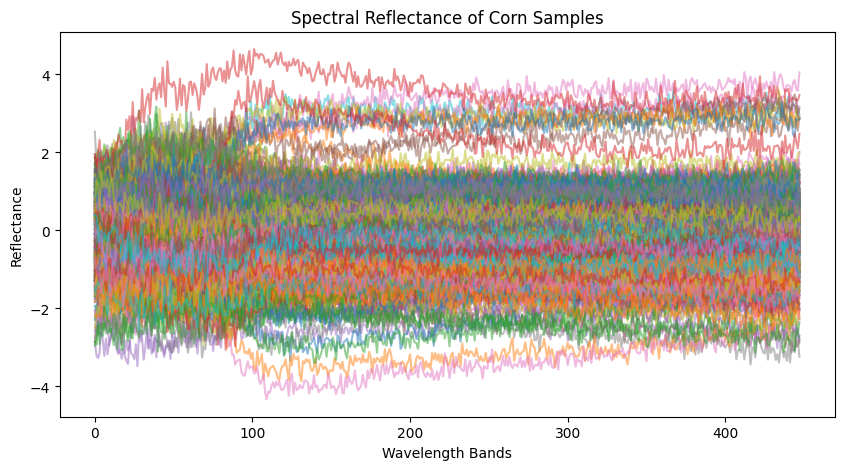

In [26]:
#visualizing spectral bandss
plt.figure(figsize=(10, 5))
plt.plot(X_scaled.T, alpha=0.5)
plt.title("Spectral Reflectance of Corn Samples")
plt.xlabel("Wavelength Bands")
plt.ylabel("Reflectance")
plt.show()


In [27]:
#PCA processing
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.87077909 0.05849069]


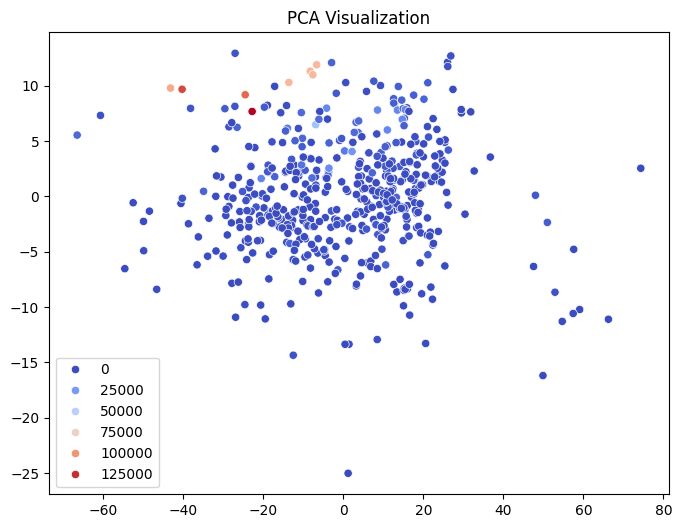

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title("PCA Visualization")
plt.show()


In [29]:
#Now splitting the data as per training and testing sets of use
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
#RANDOM FOREST WORK.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)


In [32]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 3765.0568
RMSE: 11483.805982806223
R² Score: 0.5282211884116356


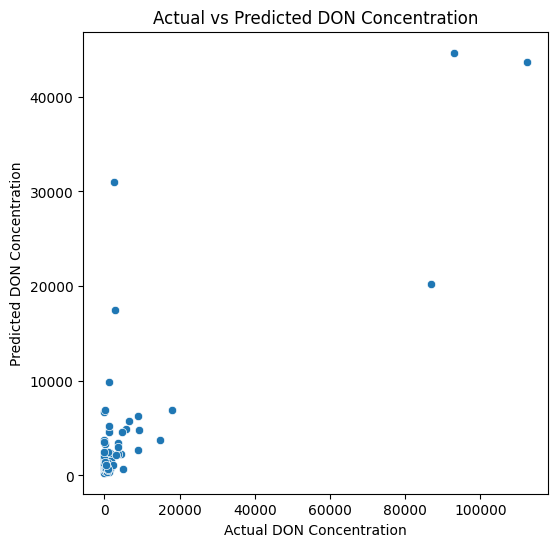

In [34]:
#Scatter plot of actual vs. predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted DON Concentration")
plt.show()